# Business Objective

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue. In this project, target market analysis, an assessment of how your product or service fits into a specific market and where it will gain the most will be performed.

 <b>Task:</b> <br> 
Q1: What was the best month for sales? How much was earned that month?<br> 
Q2: What City had the highest number of sales?<br> 
Q3: What time should we display adverstisement to maximize likelihood of customer's buying product?<br> 
Q4: What products are most often sold together?<br> 
Q5: What product sold the most? Why do you think it sold the most?<br> 


 <b>How Much Probability?</b> <br>
How much probability for next people will ordered USB-C Charging Cable?<br> 
How much probability for next people will ordered iPhone?<br> 
How much probability for next people will ordered Google Phone?<br> 
How much probability other peoples will ordered Wired Headphones?<br> 



##### Import libraries

In [1]:
import pandas as pd
import os
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Collect Data

###### Merge data from 12 files into 1 single file to create a yearly sales dataset.

In [2]:
files = [file for file in os.listdir('./Montly_data')] #get the list of all files and directories in the specified directory.
  

year_df = pd.DataFrame()

for file in files:
    data = pd.read_csv('./Montly_data/' + file)
    year_df = pd.concat([year_df, data])           #concatenate montly data
    
    
year_df.to_csv("2019.csv", index=False)  #convert pandas dataframe to a new csv file,which is the yearly data


In [3]:
year_df = pd.read_csv('2019.csv')

year_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Data Understanding

In [4]:
year_df.shape

(186850, 6)

In [5]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Display Unique Values of each column

In [6]:
for col in year_df.columns:
    print(f"Column {col}: {year_df[col].unique()}")
    
    
#year_df['Order Date'].value_counts() #count distinct values


Column Order ID: ['295665' '295666' '295667' ... '222907' '222908' '222909']
Column Product: ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' nan 'LG Dryer']
Column Quantity Ordered: ['1' '2' '4' '3' 'Quantity Ordered' nan '7' '5' '6' '8' '9']
Column Price Each: ['1700' '600.0' '11.95' '149.99' '3.84' '99.99' '2.99' '999.99' '14.95'
 '600' '11.99' '150' '400' '700' '109.99' '379.99' '300' '389.99'
 'Price Each' nan '700.0' '1700.0' '150.0' '300.0' '400.0']
Column Order Date: ['12/30/19 00:01' '12/29/19 07:03' '12/12/19 18:21' ... '06/09/19 22:07'
 '06/26/19 18:35' '06/25/19 14:33']
Column Purchase Address: ['136 Church St, New York City, NY 10001'
 

Note the inconsistency of data. Column Quantity Ordered: ['1' '2' '4' '3' 'Quantity Ordered' '7' '5' '6' '8' '9']. 'Quantity Ordered' should not be a value of quantity ordered column. After investing further, we can see that it is the same for column Order Date. Column Order Date has values "Order Date" instead of actual date. This can act as a problem when converting data from object type to int, or date.

In [7]:
year_df.describe() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Describe function results in descriptions of object data, instead of numeric. It does not give us mean, standard deviation etc. Therefore, we need to change some columns to be numeric and we will do that in data preparation stage.

###### Check Null data

In [8]:
year_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
year_df[year_df.isnull()].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


Above we can see the rows of missing data, 545 out of 186850 rows are missing which indicates

In [10]:
missingdata_percentage = '{:.2%}'.format(545/186850)
print(missingdata_percentage, 'of data is missing')

0.29% of data is missing


which is not a large amount. Let's answer "Is this value missing because it wasn't recorded or because it doesn't exist?"If we investigate the rows of missing data, we can see that the rows does not have an orderID or any other informations, thus we can say that this data probaly does not exist so we will drop in data preprocessing stage.

# Data Preprocessing
The cleaning, transforming, and integrating of data in order to make it ready for analysis. The goal of data preprocessing is to improve the quality of the data and to make it more suitable for the specific task.

### Drop all null data since it does not serve any purpose in the analysis and does not contain any information.

In [11]:
year_df = year_df.dropna(how='all')  #Drop the rows where all elements are missing.
year_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Convert data types<br>
 Another issue is that data types of the columns are all objects so here, we will convert the data types correspondingly<br>
int : Order ID, Quantity Ordered

float : Price Each

new float column : total price of each order will helps us answer questions regaring sales per month, or per year

pandas datetime object : Order Date, (helps extract month, days, time easily)

<b>Note: before converting, we need to address the issue of inconsistency in data as mentioned in data understanding stage. Column Order Date has the values "Order Date" which is not in date format, same goes for other columns as shown below.</b>

In [12]:
year_df[year_df['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3793,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3812,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4218,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5143,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5293,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


To address this error, drop all the above columns because they are not going to help with analysis and prevent us from coverting data.

In [13]:
year_df = year_df[year_df['Order Date'].str[0:2] != 'Or']

In [14]:
year_df[year_df['Order Date'].str[0:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Now that our data and its format is consistent, we can start converting data type of columns.

In [15]:
year_df['Order ID'] = year_df['Order ID'].astype('int64')
year_df['Quantity Ordered'] = year_df['Quantity Ordered'].astype('int64')
year_df['Price Each'] =  year_df['Price Each'].astype('float')
       
#new float column : total price of each order will helps us answer questions regaring sales per month, or per year 
year_df['Sales'] = year_df['Quantity Ordered'] * year_df['Price Each']  

year_df['Order Date'] = pd.to_datetime(year_df['Order Date'])
                                                                  
year_df.dtypes
                                                                                                                                      
                                                                                                                                      

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
dtype: object

# Data Preparation
Prepare data for data analysis and answering data-driven questions
<br>
There are questions corresponding to year, month and time so it's best to extract those information from order date.
<br><br>
There is a question about finding the city with the highest number of sales so extract city from Purchase Address.
<br><b>Note that there exists cities with the same name in different states, such as Portland, Maine and Portland, Oregon.
Nashville, Tennessee and Nashville, Indiana.
Springfield, Illinois and Springfield, Oregon.</b>
SO we'll format the cities in a way that differentiate thoses cities.



In [16]:
#extraction from Order Date
year_df['Year'] = year_df['Order Date'].dt.year

year_df['Month'] = year_df['Order Date'].dt.month
    
year_df['Hour'] = year_df['Order Date'].dt.hour 
   
year_df['Minute'] = year_df['Order Date'].dt.minute 

year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,12,38


In [17]:
#year_df['City'] = year_df['Purchase Address'].apply(lambda x: x.split(',')[1] ) #x - cell content


def get_city(address):
    return address.split(',')[1]   #split by comma by index 1. Everytime a comma is found, the text is split and stored in list.
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]   #split by comma by index 2 ex:CA 94016 , and then split by space by index 1


year_df['City'] = year_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") #.apply allows to run function on dataframe
year_df.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,City
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2.99,2019,6,19,2,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",149.99,2019,6,19,29,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",11.95,2019,6,18,57,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",11.95,2019,6,18,35,San Francisco (CA)
186849,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",2.99,2019,6,14,33,Atlanta (GA)


# Data Analysis

In [18]:
year_df.describe()

,Order ID,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,185.490917,2019.000183,7.059140,14.413305,29.481361
std,51512.737110,0.442793,332.731330,332.919771,0.013521,3.502996,5.423416,17.317573
min,141234.000000,1.000000,2.990000,2.990000,2019.000000,1.000000,0.000000,0.000000
25%,185831.250000,1.000000,11.950000,11.950000,2019.000000,4.000000,11.000000,14.000000
50%,230367.500000,1.000000,14.950000,14.950000,2019.000000,7.000000,15.000000,29.000000
75%,275035.750000,1.000000,150.000000,150.000000,2019.000000,10.000000,19.000000,45.000000
max,319670.000000,9.000000,1700.000000,3400.000000,2020.000000,12.000000,23.000000,59.000000


<AxesSubplot:>

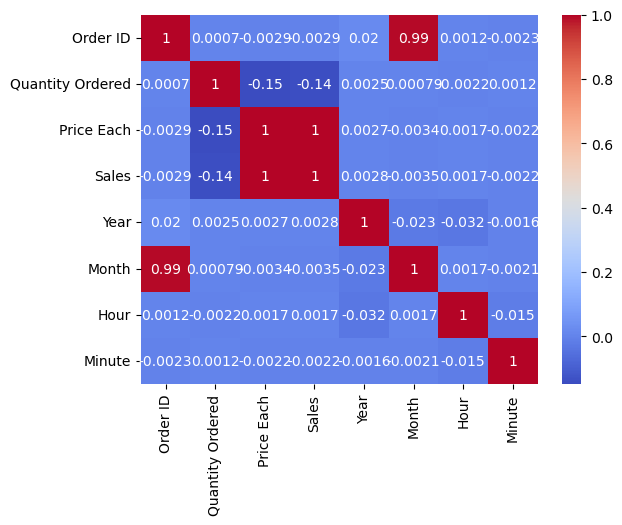

In [19]:
sns.heatmap(year_df.corr(), cmap='coolwarm', annot=True)

# Tasks
Q1: What was the best month for sales? How much was earned that month?<br>
Q2: What City had the highest number of sales?<br>
Q3: What time should we display adverstisement to maximize likelihood of customer's buying product?<br>
Q4: What products are most often sold together?<br>
Q5: What product sold the most? Why do you think it sold the most?<br>

### Q1: What was the best month for sales? How much was earned that month?

In [20]:
import matplotlib.pyplot as plt
result = year_df.groupby('Month').sum()
result

,Order ID,Quantity Ordered,Price Each,Sales,Year,Hour,Minute
Month,,,,,,,
1,1421630798,10903,1811768.38,1822256.73,19602505,139485,282440
2,1871052592,13449,2188884.72,2202022.42,24177525,172669,354885
3,2564810956,17005,2791207.83,2807100.38,30593907,218969,447559
4,3387347100,20558,3367671.02,3390670.24,36905301,262259,544186
5,3345871523,18667,3135125.13,3152606.75,33446754,238780,487899
6,2932976072,15253,2562025.61,2577802.26,27365526,195528,402436
7,3284139576,16072,2632539.56,2647775.76,28857567,206169,417349
8,2899373917,13448,2230345.42,2244467.88,24149259,172289,353857
9,2948726831,13109,2084992.09,2097560.13,23462799,168513,341698


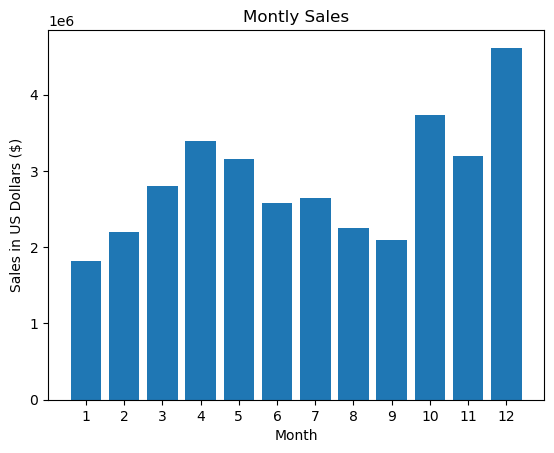

In [21]:
plt.bar(result.index,result['Sales'])
plt.xlabel('Month')
plt.xticks(result.index)
plt.ylabel('Sales in US Dollars ($)')
plt.title('Montly Sales')
plt.show() 


According to the data, December was the best month for sales and $4,613,443.34  was earned that month.

### Q2: What City had the highest number of sales?

In [22]:
result = year_df.groupby('City').sum()
result


,Order ID,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
City,,,,,,,,
Atlanta (GA),3423838407,16602,2779908.20,2795498.58,30044739,104794,214264,442932
Austin (TX),2280982185,11153,1809873.61,1819581.75,19998197,69829,141946,289060
Boston (MA),4598265261,22528,3637409.77,3661642.01,40246750,141112,288225,590442
Dallas (TX),3415643578,16730,2752627.82,2767975.40,29921582,104620,214390,435155
Los Angeles (CA),6811084693,33289,5421435.23,5452570.80,59772496,208325,427444,866638
New York City (NY),5736333884,27932,4635370.83,4664317.43,50224654,175741,357696,733598
Portland (ME),563266345,2750,447189.25,449758.27,4956645,17144,35211,72856
Portland (OR),2305594747,11303,1860558.22,1870732.34,20210192,70621,144421,295533
San Francisco (CA),10304443952,50239,8211461.74,8262203.91,90313920,315520,643265,1319477


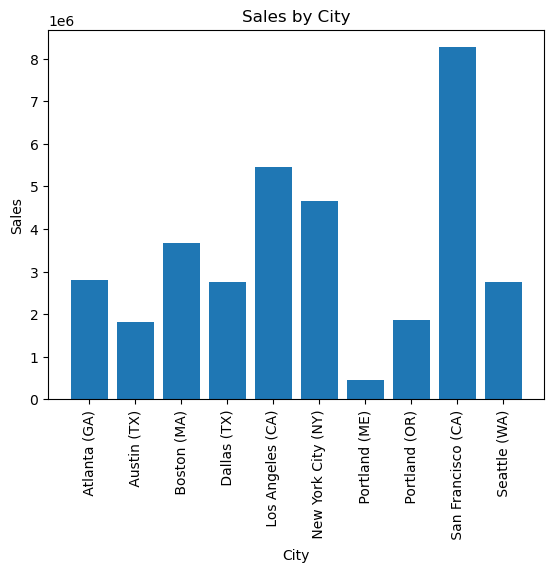

In [23]:
plt.bar(result.index,result['Sales'])
plt.xlabel('City')
plt.xticks(result.index, rotation = 'vertical', size = 10)
plt.ylabel('Sales')
plt.title('Sales by City')
plt.show() 

According to data, San Francisco, California has the highest sales for electronics. Because most people in SF work in Tech indutry, people in SF maybe more tech savvy than other states. Additionally, due to Sillicon Valley, more tech products are advertised and marketed in SF.

### Q3: What time should we display adverstisement to maximize likelihood of customer's buying product?


In [24]:
result = year_df.groupby('Hour').count()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Minute,City
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


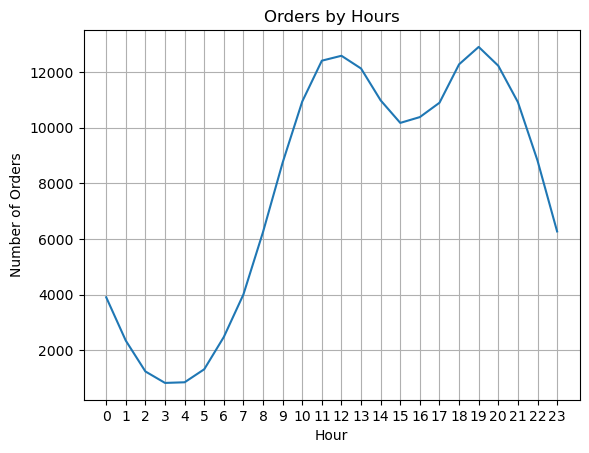

In [25]:
plt.plot(result.index,result['Order ID'])
plt.xlabel('Hour')
plt.xticks(result.index)
plt.ylabel('Number of Orders')
plt.title('Orders by Hours')
plt.grid()
plt.show() 

According to data, the peak time for ordering is 12pm and 7pm. 12pm would be around lunch time/break and so people would have time to order. 7pm would be after work for many people.<br>

Good time to display ads would be 11am-12pm and 6pm-7pm. Doing so will increase the likelyhood of customer's purchasing product as customer would be actively looking at their devices and buying products during those time.


### Q4: What products are most often sold together?
Investigate OrderID, an order id represents each order. Some orders have multiple products bought together. If that's the case, then they have the same Order IDs.

In [101]:
#store the rows with duplciate orderID into new dataframe
df = year_df[year_df['Order ID'].duplicated(keep = False) ] #keep=False removes elements from the output if the applied function returns a falsy value, so here don't keep if it's not duplicated.

#create a new column for new df that is grouped by orderID, get the products from the group by result, and join the products for each order
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)  )

#Now, we no longer need the duplicate rows since we have collected all the products of an order in "Grouped" column
df = df.drop_duplicates(subset=['Order ID', 'Grouped'])
df = df[['Order ID', 'Grouped']]
df.head(100)


/var/folders/dc/hrkttllj58z4qj5pty5pj2100000gn/T/ipykernel_1832/3099849562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)  )


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [108]:
#Now, the data is ready. Count the data from grouped column

from itertools import combinations
from collections import Counter

#Code Explanations:
#count the frequency of pairs of items in a list of rows.
#(combinations(row_list, 2)) : creates a sequence of tuples of length 2 representing all possible combinations of two items from row_list
# Counter(..) : creates a dictionary that counts the frequency of each item in a sequence. 
#              In this case, it is used to count the frequency of each tuple representing a pair of items in the combinations of row_list for all iterations.
# update() - a method takes an iterable as an argument and updates the counts in the dictionary with the counts of the iterable.

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))    #find 2 products sold together the most, count when each combination of 2 is found 


for key, value in count.most_common(10):
    print(key, value)

    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Now that the products that are most often sold together are found. Better promotions can be offered based on customer's purchase history and views. By doing so, the chance of customer purchasing on promotion will be higher since the items often sold togther are promoted. It can work similar to recommender system which has been a huge success in marketing. Thus, this is a valuable insight.

### Q5: What product sold the most? Why do you think it sold the most?<br> 

In [109]:
result = year_df.groupby('Product').sum().sort_values(by = ['Quantity Ordered'],  ascending=False)
result

,Order ID,Quantity Ordered,Price Each,Sales,Year,Month,Hour,Minute
Product,,,,,,,,
AAA Batteries (4-pack),4764959472,31017,61716.59,92740.83,41674182,146370,297332,612113
AA Batteries (4-pack),4744173938,27635,79015.68,106118.40,41544963,145558,298342,609039
USB-C Charging Cable,5049538196,23975,261740.85,286501.25,44222161,154819,314645,647586
Lightning Charging Cable,4994090695,23217,323787.10,347094.15,43727507,153092,312529,634442
Wired Headphones,4350951550,20557,226395.18,246478.43,38122759,133397,271720,554023
Apple Airpods Headphones,3579120098,15661,2332350.00,2349150.00,31393435,109477,223304,455570
Bose SoundSport Headphones,3071496156,13457,1332366.75,1345565.43,26903178,94113,192445,392603
27in FHD Monitor,1724223743,7550,1125974.93,1132424.50,15156636,52558,107540,219948
iPhone,1571389766,6849,4789400.00,4794300.00,13814000,47941,98657,201688


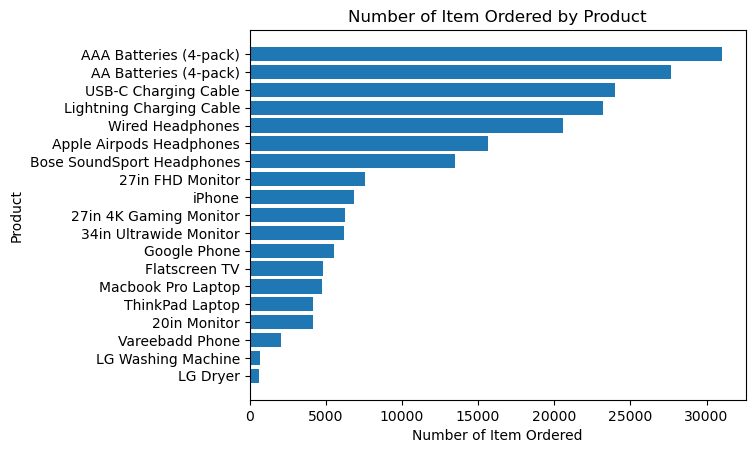

In [111]:
result = result.sort_values(by = ['Quantity Ordered'],  ascending= True)

plt.barh(result.index, result['Quantity Ordered'] )
plt.xlabel('Number of Item Ordered')
plt.ylabel('Product')
plt.title('Number of Item Ordered by Product')
plt.show() 

The plot shows that the top 5 ordered products are AAA Batteries (4-pack),AA Batteries (4-pack),USB-C Charging Cable,Lightning Charging Cable and Wired Headphones. They are sold the most because they have short lifetime. The items do not last in long term because batteries will run out with usage. For instance, charging cables and wired headphones lose effectiveness and get worn out over time. Other factors would be the price of item as people frequently buy cheaper products compared to expensive products.<br>
The data showed the products in high demand which means we can use this insight to decide how many products we should produce to meet the demand.